<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Imbalanced Data

Inspired by posts on [Machine Learning Mastery](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), [Towards Data Science](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18) and [Kaggle](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)

---

## How imbalanced is imbalanced?
___
Imbalanced data typically refers to classification problems where the classes are not represented equally. Even
a modest class imbalance like 4:1 can cause problems when building a classification model and evaluating its performance.

Let's look at the [Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/home) available on Kaggle.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

card = pd.read_csv('./data/creditcard.csv')
#card.rename(str.lower, axis='columns', inplace=True)
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


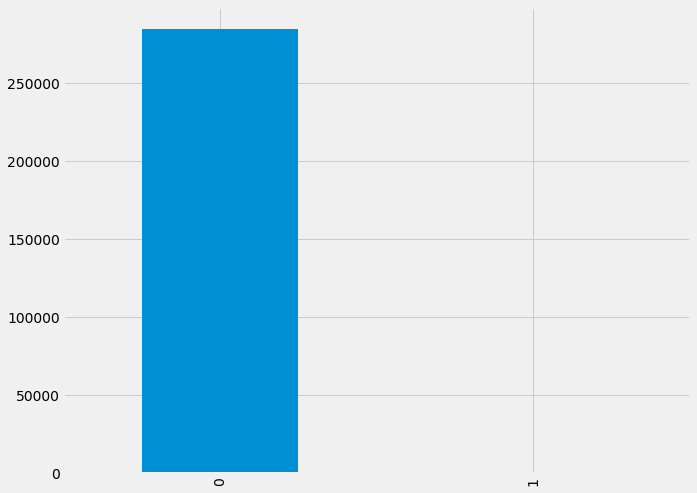

In [9]:
print(card.Class.value_counts())
card.Class.value_counts().plot(kind='bar');

In [22]:
fraud_frac = card.Class.value_counts().min() / card.shape[0]
print("Fraction of fraudulent credit card transactions: {}".format("%.4f" % fraud_frac))

Fraction of fraudulent credit card transactions: 0.0017


**Question:** What would the null accuracy in this case?

## How to overcome class imbalance?
___
##### Collect more data

##### Try advanced classification metrics
Accuracy is miseading when used on imbalanced data. Try looking at the **confusion matrix** to figure out what exactly is misclassified. 

Other commonly used metrics include **precision** (a measure of a classifiers exactness), **recall** (a measure of a classifiers completeness) and **F1 Score** (a weighted average of precision and recall). 

Plotting a ROC curve is useful for choosing a model's discrimination threshold.

##### Try other models
It is generally recommended to always try a variety of algorithms when building a machine learning model. Decision trees (and Random Forest) frequently perform well on imbalanced data and could provide a much better solution than, say, a Logistic Regression model.

##### Resample: undersample majority class
If you have hundreds of thousands of observations in each class reducing the majority class so that the ratio is roughly 1:1 could be a way to go. A drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalisation to the test set. The simpliest way to perform undersampling is by ramdomly selecting the necessary number of observations using `.sample()`.

##### Resample: oversample minority class
When you don't have too much data to work with oversampling can be a good choice. It is done by randomly replicating observations from the minority class until the ratio between the classes becomes approximately 1:1. You can add copies of instances from the under-represented class using `scikit-learn .resample()` function. 

**Important note:** Oversampling should be done **after** splitting the data into training and test sets. Otherwise, a model might simply memorise specific data points and cause overfitting and poor generalization to the test data.

![](./assets/undersampling-oversampling.png)

##### Generate synthetic samples
A simple way to generate synthetic samples is to look at the distribution of each attribute and ramdomly draw a value from each distribution. You will have more and different data, however, this approacch will not preserve the non-linear relationships between the attributes.

A popular algorithm for generating synthetic data is called Synthetic Minority Over-sampling Technique (SMOTE). SMOTE consists of synthesising elements for the minority class, based on those that already exist. It works by randomly picing a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. `imblearn.over_sampling` library provides a nice implementation of SMOTE.

**Important note:** Like with oversampling SMOTE should be performed only **after** splitting the data into training and test sets.

![](./assets/smote.png)